In [1]:
import numpy as np
from data_cube import DataCube

In [2]:
def grow_array(a, axis=0):
    """
    Increase size of array by doubling on specified axis
    doubling this way gives O(log n) amortized time
    
    INPUTS
    a - input array of type np.array; must be 2 dimensional
    axis - is axis on which to double
    """
    r, c = a.shape
    blnk = np.zeros(shape=(r,c)) # blank array
    if axis == 0:
        res = np.r_[a, blnk]
        return res
    else:
        res = np.c_[a, blnk]
        return res
    
def trim_array(a, axis=0):
    """
    Trim zero rows from the bottom of an array
    
    INPUTS
    a - input array of type np.array; must be 2 dimensional
    axis - is axis on which to double
    """
    r, c = a.shape
    for n, i in enumerate(a):
        if all(i == np.zeros(c)):
            return a[:n, :]

In [3]:
dc = DataCube(
        subjects=["10", "20"],
        gestures=["1", "2", "3", "4"],
        channels=["2", "4", "5", "6", "8"],
        data_grp="parsed"
        )
dc.load_data()

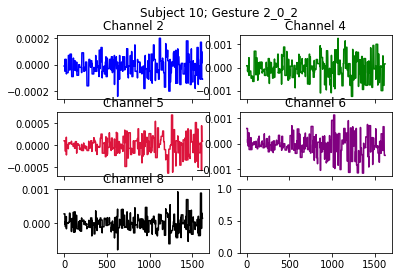

In [4]:
dc.plot_gests("10", "2_0_2")

In [5]:
tst=dc.data_set["10"]["2_0_2"]
tst.shape

(1584, 7)

In [6]:
sf = tst[0, :].reshape(1, -1)
c = 0
for n, r in enumerate(tst):
    
    if all(sf[c, 1:] == r[1:]):
        continue
    else:
        c += 1
        if sf.shape[0] <= c:
            sf = grow_array(sf)
        sf[c, :] = r

In [7]:
sf = trim_array(sf)

In [8]:
sf.shape

(221, 7)

In [9]:
dc.data_set["10"]["2_0_2"] = sf

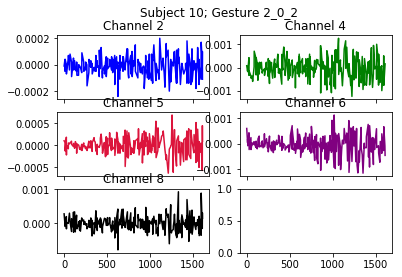

In [10]:
dc.plot_gests("10", "2_0_2")